**Breaking Down Accidents** -
Analyzed traffic accident data using Python (Pandas, Seaborn, Matplotlib). Visualized trends based on time, location, and accident causes. Implemented classification of major/minor accidents and explored correlations between weather conditions and accident severity.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving global_traffic_accidents.csv to global_traffic_accidents (1).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
filepaths = "global_traffic_accidents.csv"
df = pd.read_csv(filepaths)
print("Data loaded successfully.")

Data loaded successfully.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Accident ID        10000 non-null  object 
 1   Date               10000 non-null  object 
 2   Time               10000 non-null  object 
 3   Column1            10001 non-null  object 
 4   Latitude           10000 non-null  float64
 5   Longitude          10000 non-null  float64
 6   Weather Condition  10000 non-null  object 
 7   Road Condition     10000 non-null  object 
 8   Vehicles Involved  10000 non-null  float64
 9   Casualties         10000 non-null  float64
 10  Cause              10000 non-null  object 
dtypes: float64(4), object(7)
memory usage: 859.6+ KB


In [ ]:
df.describe()

,Latitude,Longitude,Vehicles Involved,Casualties
count,10000.000000,10000.000000,10000.000000,10000.00000
mean,-0.543557,0.338573,2.999100,4.98820
std,51.917928,103.379168,1.408935,3.13015
min,-89.985688,-179.961984,1.000000,0.00000
25%,-45.426619,-88.231733,2.000000,2.00000
50%,-1.080556,-0.682727,3.000000,5.00000
75%,44.137309,89.973059,4.000000,8.00000
max,89.990081,179.981695,5.000000,10.00000


In [ ]:
print(df.isnull().sum())

Accident ID          1
Date                 1
Time                 1
Column1              0
Latitude             1
Longitude            1
Weather Condition    1
Road Condition       1
Vehicles Involved    1
Casualties           1
Cause                1
dtype: int64


In [ ]:
df.dtypes

,0
Accident ID,object
Date,object
Time,object
Column1,object
Latitude,float64
Longitude,float64
Weather Condition,object
Road Condition,object
Vehicles Involved,float64
Casualties,float64


In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df["Time"] = pd.to_datetime(df["Time"])
df['Column1'] = df['Column1'].astype(str)
df['Weather Condition'] = df['Weather Condition'].astype(str)
df['Road Condition'] = df['Road Condition'].astype(str)
df['Cause'] = df['Cause'].astype(str)

In [ ]:
df.dtypes

,0
Accident ID,object
Date,datetime64[ns]
Time,datetime64[ns]
Column1,object
Latitude,float64
Longitude,float64
Weather Condition,object
Road Condition,object
Vehicles Involved,float64
Casualties,float64


Accidents in 2023 vs 2024

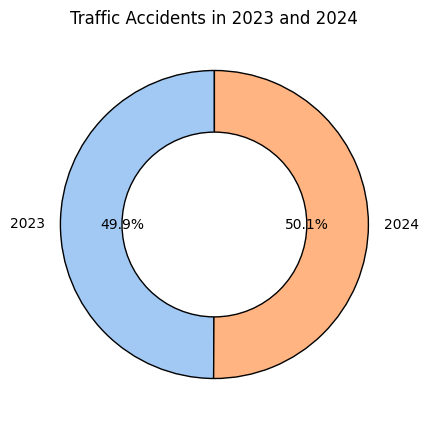

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
accidents_2023 = df[df['Date'].dt.year == 2023].shape[0]
accidents_2024 = df[df['Date'].dt.year == 2024].shape[0]
labels = ['2023', '2024']
sizes = [accidents_2023, accidents_2024]
colors = sns.color_palette("pastel")
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors,startangle=90, wedgeprops={'edgecolor': 'black'})
centre_circle = plt.Circle((0, 0), 0.60, fc='white', edgecolor = 'black')
plt.gca().add_artist(centre_circle)
plt.title("Traffic Accidents in 2023 and 2024")
plt.show()

Accidents due to bad weather condition and bad road condition

<ipython-input-14-3bd5c2a4bb0e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.index, y=weather_counts.values, palette="Accent")


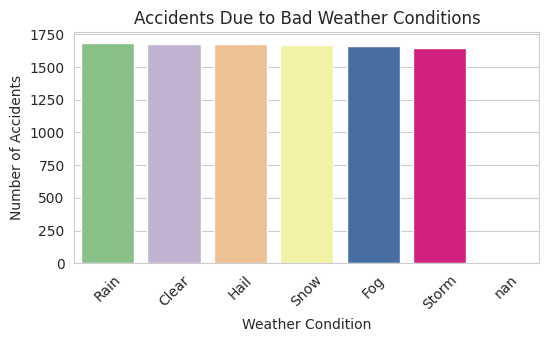

<ipython-input-14-3bd5c2a4bb0e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=road_counts.index, y=road_counts.values, palette="Set3")


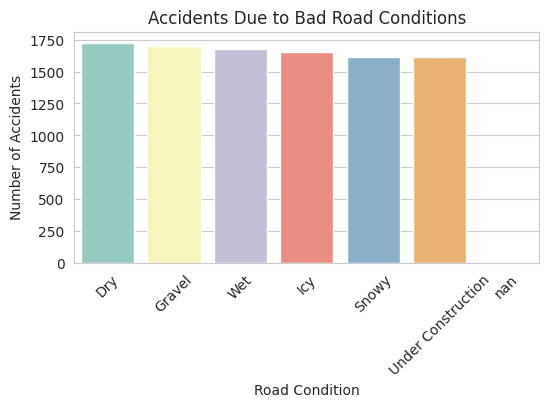

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
weather_counts  = df['Weather Condition'].value_counts()
road_counts = df['Road Condition'].value_counts()
sns.set_style("whitegrid")
# chart 1 - Weather Condition
plt.figure(figsize=(6, 3))
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette="Accent")
plt.xticks(rotation=45)
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.title("Accidents Due to Bad Weather Conditions")
plt.show()

#chart 2 - Road Condition
plt.figure(figsize=(6, 3))
sns.barplot(x=road_counts.index, y=road_counts.values, palette="Set3")
plt.xticks(rotation=45)
plt.xlabel("Road Condition")
plt.ylabel("Number of Accidents")
plt.title("Accidents Due to Bad Road Conditions")
plt.show()

Accidents in India vs Outside India

<ipython-input-15-b6158daf5b8d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_count.index, y=accidents_count.values, palette="Set2")


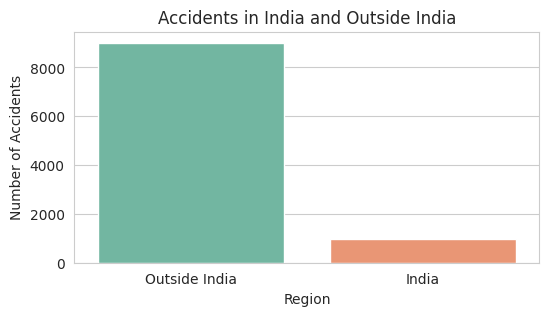

In [ ]:
df['Region'] = df['Column1'].apply(lambda x: 'India' if 'India' in x else 'Outside India')
accidents_count = df['Region'].value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(6, 3))
sns.barplot(x=accidents_count.index, y=accidents_count.values, palette="Set2")
plt.xlabel("Region")
plt.ylabel("Number of Accidents")
plt.title("Accidents in India and Outside India")
plt.show()

Time vs accident count

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour  # Extract hour only

<ipython-input-17-fd0ed295fabd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_counts.index, y=time_counts.values, palette="coolwarm")


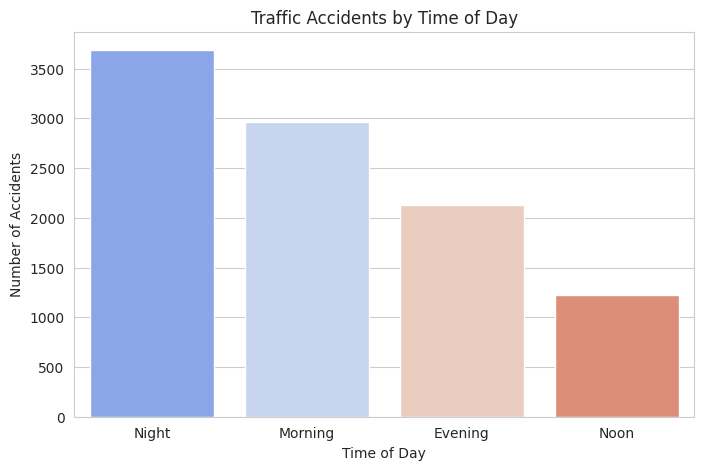

In [ ]:
def classify_time(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 15:
        return "Noon"
    elif 15 <= hour < 20:
        return "Evening"
    else:
        return "Night"

df['Time of Day'] = df['Time'].apply(classify_time)
time_counts = df['Time of Day'].value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x=time_counts.index, y=time_counts.values, palette="coolwarm")
plt.xlabel("Time of Day")
plt.ylabel("Number of Accidents")
plt.title("Traffic Accidents by Time of Day")
plt.show()

Casualties vs. Time of Day

<ipython-input-18-a6e68793cb9a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Time Division", y="Casualties", data=casualties_by_time, palette="coolwarm")


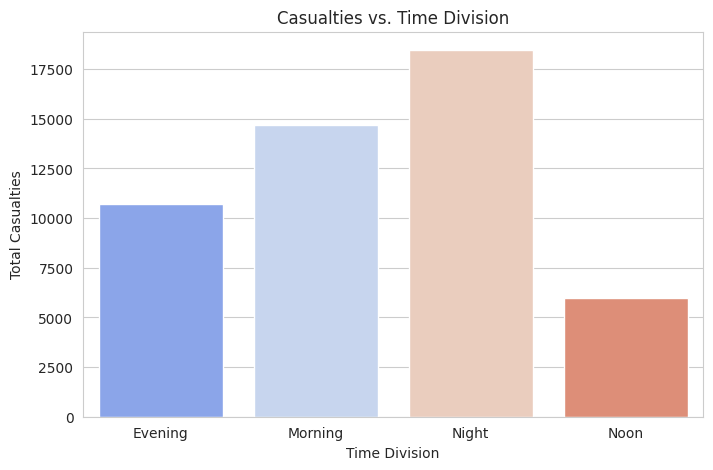

In [ ]:
def classify_time(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 15:
        return "Noon"
    elif 15 <= hour < 20:
        return "Evening"
    else:
        return "Night"
df["Time Division"] = df["Time"].apply(classify_time)
casualties_by_time = df.groupby("Time Division")["Casualties"].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x="Time Division", y="Casualties", data=casualties_by_time, palette="coolwarm")

plt.xlabel("Time Division")
plt.ylabel("Total Casualties")
plt.title("Casualties vs. Time Division")
plt.show()

Cause & Casualties: India vs. Outside India

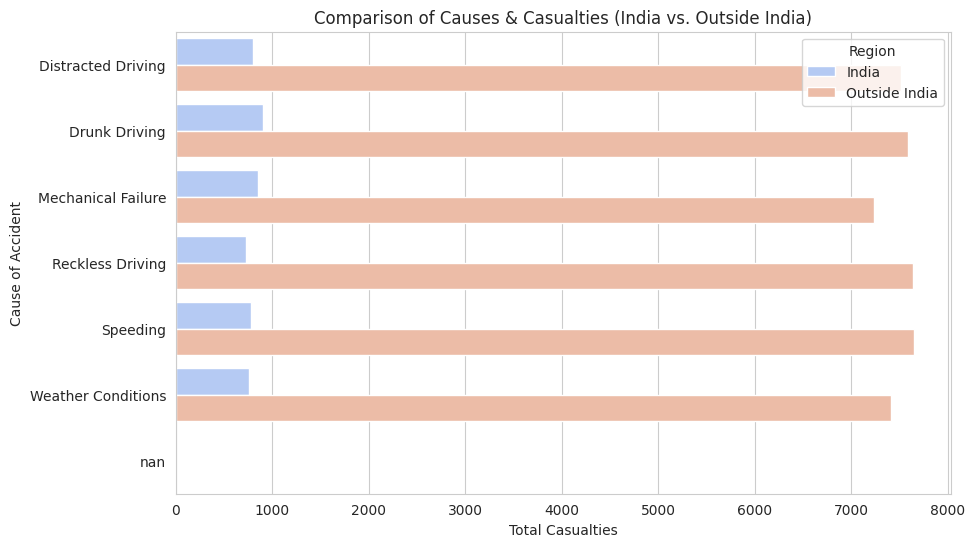

In [ ]:
def classify_region(location):
    return "India" if "India" in str(location) else "Outside India"
df["Region"] = df["Column1"].apply(classify_region)
casualties_by_cause = df.groupby(["Region", "Cause"])["Casualties"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="Casualties", y="Cause", hue="Region", data=casualties_by_cause, palette="coolwarm")

plt.xlabel("Total Casualties")
plt.ylabel("Cause of Accident")
plt.title("Comparison of Causes & Casualties (India vs. Outside India)")
plt.legend(title="Region")
plt.show()

Major/Minor Accidents: India & Outside India

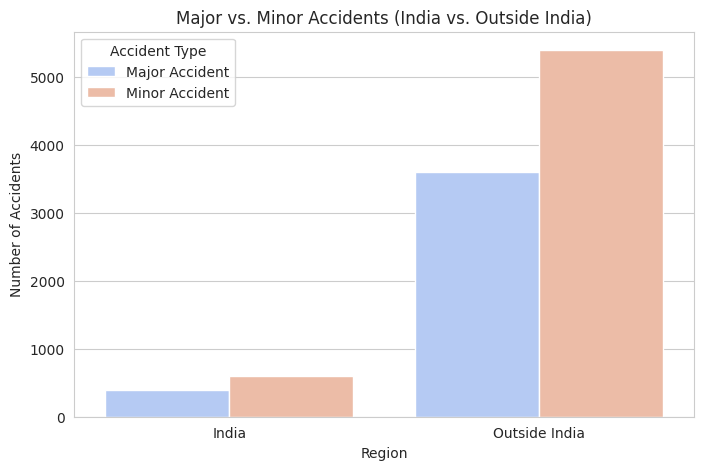

In [ ]:
def classify_region(location):
    return "India" if "India" in str(location) else "Outside India"

df["Region"] = df["Column1"].apply(classify_region)

def classify_accident(vehicles):
    return "Major Accident" if vehicles > 3 else "Minor Accident"

df["Accident_Type"] = df["Vehicles Involved"].apply(classify_accident)

accident_counts = df.groupby(["Region", "Accident_Type"]).size().reset_index(name="Count")

plt.figure(figsize=(8, 5))
sns.barplot(x="Region", y="Count", hue="Accident_Type", data=accident_counts, palette="coolwarm")

plt.xlabel("Region")
plt.ylabel("Number of Accidents")
plt.title("Major vs. Minor Accidents (India vs. Outside India)")
plt.legend(title="Accident Type")
plt.show()

accident causes for 2023 and 2024


<Figure size 1000x600 with 0 Axes>

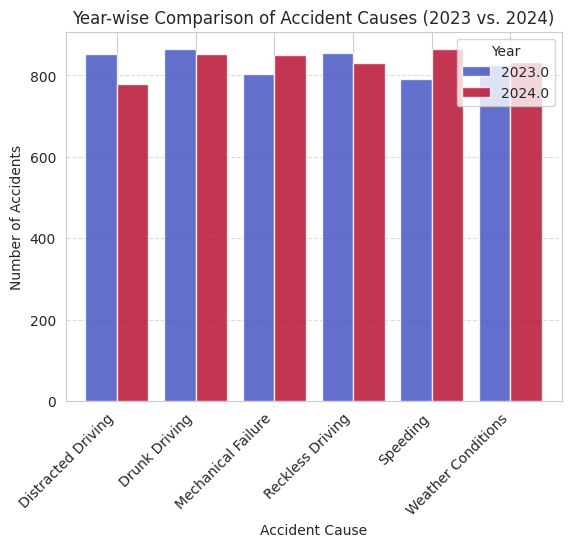

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

df["Year"] = df["Date"].dt.year

cause_comparison = df.groupby(["Year", "Cause"]).size().reset_index(name="Accident Count")

cause_pivot = cause_comparison.pivot(index="Cause", columns="Year", values="Accident Count").fillna(0)

plt.figure(figsize=(10, 6))
cause_pivot.plot(kind="bar", colormap="coolwarm", alpha=0.8, width=0.8)

plt.xlabel("Accident Cause")
plt.ylabel("Number of Accidents")
plt.title("Year-wise Comparison of Accident Causes (2023 vs. 2024)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Accident Type vs. Time Category for both 2023 and 2024

<Figure size 1200x600 with 0 Axes>

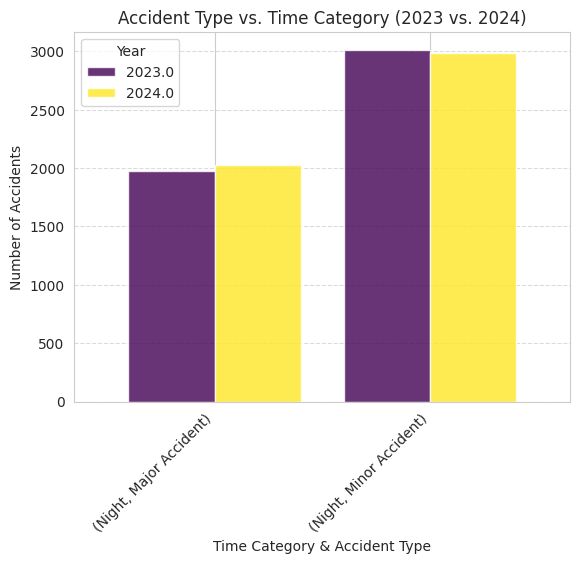

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
df["Year"] = df["Date"].dt.year

def classify_time(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 15:
        return "Noon"
    elif 15 <= hour < 20:
        return "Evening"
    else:
        return "Night"

def classify_accident(vehicles):
    return "Major Accident" if vehicles > 3 else "Minor Accident"

df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M", errors='coerce').dt.hour
df["Time_Category"] = df["Hour"].apply(classify_time)
df["Accident_Category"] = df["Vehicles Involved"].apply(classify_accident)
accident_data = df.groupby(["Year", "Time_Category", "Accident_Category"]).size().reset_index(name="Accident Count")
accident_pivot = accident_data.pivot_table(index=["Time_Category", "Accident_Category"], columns="Year", values="Accident Count", fill_value=0)


plt.figure(figsize=(12, 6))
accident_pivot.plot(kind="bar", colormap="viridis", alpha=0.8, width=0.8)
plt.xlabel("Time Category & Accident Type")
plt.ylabel("Number of Accidents")
plt.title("Accident Type vs. Time Category (2023 vs. 2024)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


can we add week in this date ? if yes then tell no of accidents weekdays acc

can we divide time in rush hours, office hours like this and compare accidents count, if then
go for country wise



type of accidents in various location

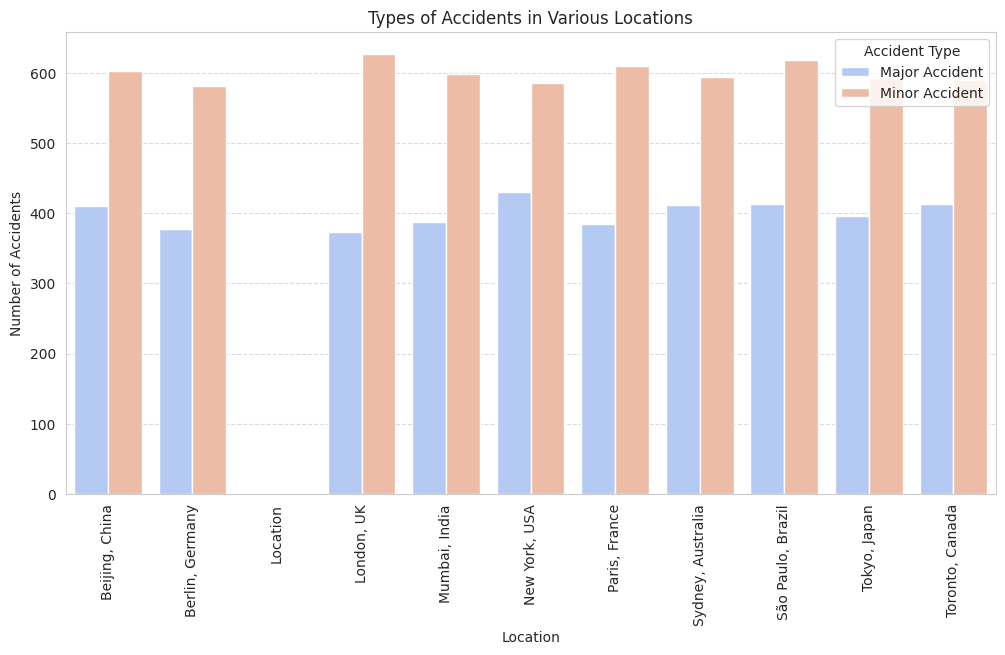

In [ ]:
df["Accident Type"] = df["Vehicles Involved"].apply(classify_accident)
accident_by_location = df.groupby(["Column1", "Accident Type"]).size().reset_index(name="Accident Count")

plt.figure(figsize=(12, 6))
sns.barplot(x="Column1", y="Accident Count", hue="Accident Type", data=accident_by_location, palette="coolwarm")

plt.xlabel("Location")
plt.ylabel("Number of Accidents")
plt.title("Types of Accidents in Various Locations")
plt.xticks(rotation=90)  # Rotate for better readability
plt.legend(title="Accident Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

ccasualties vs months



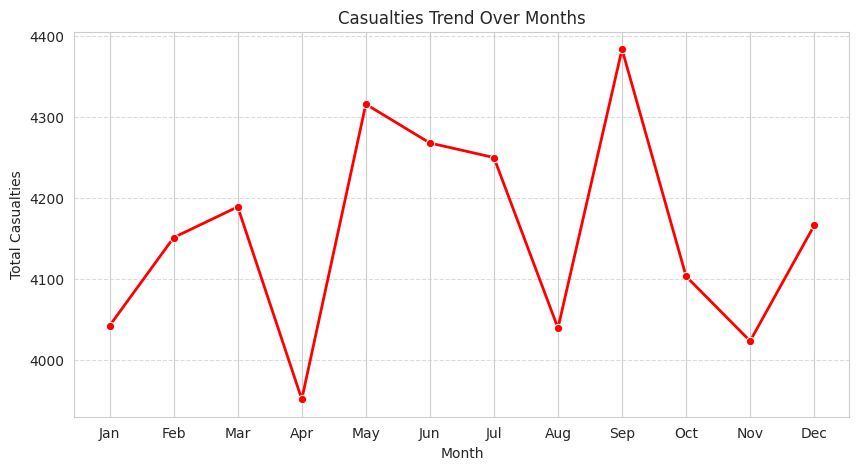

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y", errors="coerce")

df["Month"] = df["Date"].dt.month

casualties_by_month = df.groupby("Month")["Casualties"].sum().reset_index()

month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
casualties_by_month["Month Name"] = casualties_by_month["Month"].apply(lambda x: month_names[int(x)-1])

plt.figure(figsize=(10, 5))
sns.lineplot(x="Month Name", y="Casualties", data=casualties_by_month, marker="o", color="red", linewidth=2)

plt.xlabel("Month")
plt.ylabel("Total Casualties")
plt.title("Casualties Trend Over Months")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()